# The Malthusian Growth Model

Imports and set magics:

In [30]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import MalthusEconomyBaseline
from modelproject import MalthusEconomyStochasticTechnology

#Creating an instance of the MalthusEconomyBaseline class from the modelproject.py file

MEB = MalthusEconomyBaseline()
MEST = MalthusEconomyStochasticTechnology()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model description

This model is an adaptation of the classical Malthusian growth model. It incorporates a production function, an endogenous birth rate, and an exogenous death rate. Here's a concise overview of the model equations:

The total output is determined by a Cobb-Douglas production function that takes 3 inputs. $L_t$ represents the labor force in period t. $A$ represents total factor productivity, and $X$ respresents land. In the baseline model, we will keep these variables fixed, but later we will extend the model to explore what happens when total factor productivity grows at constant rate over time. We define the system as a closed economy, which consumes all that it produces - thus income and output is equal. Furthermore all members of the population function as workers, and as such, contribute to the total production.

The production function is defined as such:
$Y_t=L_t^{1-\alpha}(AX)^\alpha$, where $0<\alpha<1$, such that the production function displays decreasing marginal productivity of labor.
​	
Thus output per capita can defined:
$y_t={(AX)/L_t}^\alpha$
 
The birth rate $n_t$ governs the amount of new workers each worker gives birth to. The birth rate is positively dependant on income per capita:
$n_t={\eta}y_t$. Furthermore, an exogenous mortality rate $\mu$ is introduced.

Population dynamics within the economy is determined by the birth rate and the mortality rate within the system, and is formulated as such:
$L_{t+1}=(1+n_t-\mu)L_t$

Population in the next period is therefore the existing population plus the newly birthed workers subtracted by the workers that have passed away.



## Analytical solution

As this model is fairly simple, the analytical solution is easily derived.

By inserting the income per capita into the birth rate $n_t={\eta}y_t$, and then inserting the result in the equation that governs population dynamics, we obtain the law of motion of the population within the system:

$L_{t+1}(L_t)=\eta(AX)^{\alpha}L_t^{1-\alpha}+(1-\mu)L_t$

To assess the existence of a stable steady state of population, we check whether the law of motion satisfies the INADA-conditions:

The law of motion intercepts origo:$L_{t+1}(0)=0$. The population in the next period is increasing in the current population: $L'_{t+1}(L_t)>0$. The law of motion is strictly concave: $L''_{t+1}(L_t)=-\eta{\alpha}(1-\alpha)L_t^{-\alpha-1}(AX)^{\alpha}<0$. The slope of the population is larger than 1 at origo: $lim_{L_t\rightarrow{0}}L'_{t+1}(L_t)=\infty>1$. The slope of the population is less than 1 when $L_t$ tends to infinity:
$lim_{L_t\rightarrow{\infty}}L'_{t+1}(L_t)=1-\mu<1$. We can therefore rest assured that a stable steady state population exists given an initial population $L_0$.



***Steady state population and income per capita:***

We derive the steady state population by imposing $L_t=L_{t+1}=L_{ss}$, and arrive at the steady state solution for the population:

$L_{ss}=(\frac{\eta}{\mu})^{1/{\alpha}}AX$

To derive income per capita in steady state, we simply evaluate the income per capita equation in $L_{ss}$, and arrive at this expression:

$y_{ss}=\frac{\mu}{\eta}$

We observe that income per capita in steady state, is neither a function of labour, land or total factor productivity, but merely dependant on the ratio between mortality and the birth rate.





**Parameter assignment**

Let us start by calculating the steady state values yielded by the analytical solutions to the model:

In order to calculate the analytical solutions, we first assign values to paramters and (for now) exogenous variables:

$\alpha=0,5$
$\eta=0,5$
$\mu=0,5$
$X=1$
$A=1$
$L_0=100$

**Steady state solutions**


In [3]:
print("Population in steady state is equal to " + str(MEB.L_ss()))
print("Income per capita in steady state is equal to " + str(MEB.output_per_capita_ss()))



Population in steady state is equal to 1.0
Income per capita in steady state is equal to 1.0


For simplicity we set parameters initially such that the steady state values are 1.

## Numerical solution

We will now attempt to obtain the steady steady solutions by utilizing a numerical solver, that finds the steady state values of our variables of interest.

Periods passed before steady state is reached: 121
Steady state population: 1.0000000000000004
Steady state income per capita: 0.9999999999999998


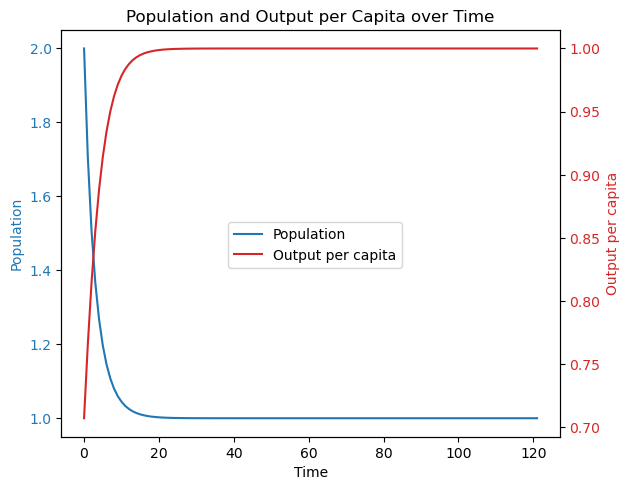

In [10]:
MEB.solve_ss()


First of all we conclude that the steady state values produced by our numerical solver are almost iddentical to the steady state values yielded by the analytical solutions. 

We see that the population is 2 in period 0, as dictated by the parameter $L_0$. This is double the population of the steady state equilibrium of the system. As a result income per capita is dilluted from 1 to approximately 0,7, which discourages the members of the population to have children, since they now have less income to spend. Consequentially, the quantity of new labourers born falls drastically, and slowly, as the population shrinks, income per capita rises as total production is shared among a smaller population. After 121 periods of adjustment we end up in the steady state equilibrium, where the populations is 1 and the income per capita is 1. These are the dynamics of a Malthusian economy.

# Introducing growth and randomness to the total factor productivity

We thought it interesting to add a layer of complexity to the model, so we decided to implement a random walk with drift into the evolution of the total factor productivity. Instead of having a constant technological level, the variable $A_t$ now follows an AR(1)-process with a normally distributed error term:

$A_t=A_t(1+g_A)+{\epsilon}_{t}$, where ${\epsilon}_{t}$ ~ $N({\mu}_A, {\sigma}_A^2)$

The analytical solutions to model have now been augmented. This is due to the systematic growth in the total factor productivity. The error term of the AR-process does not affect this conclusion, as the expectation of the innovation is 0.

The steady state income per capita is now $L^*_{ss}=\frac{g_A+\mu}{\eta}$



Final income per capita: 1.039981069441717


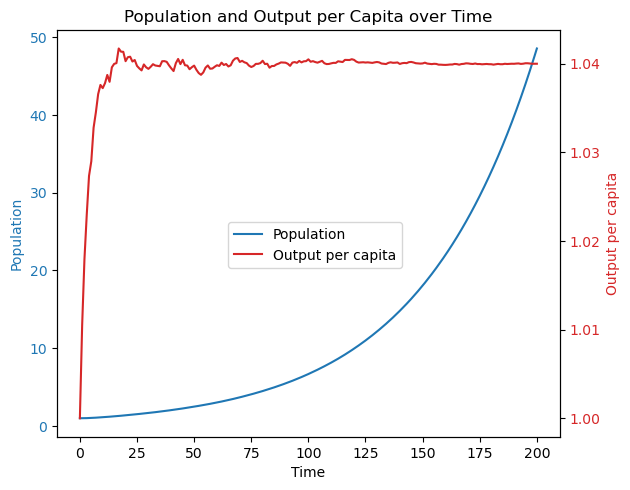

In [31]:
MEST.solve_ss()

We see that the growth in the total factor productivity increases total ouput in every period (with minor deviations because of the error term), and as such income per capita increases for a while. This increase in income per capita stimulates child birth, as the population spends more of it's income on chield-bearing. Thus the population grows.

So we have an ever-growing population and an ever-growing total ouput - the first dillutes the second such that malthuasian stagnation of income per capita persists.